In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#######################task 2 TITANIC DATA
df2=pd.read_csv(r'C:\Users\DELL\Desktop\intern\task 2\test.csv')
df3=pd.read_csv(r'C:\Users\DELL\Desktop\intern\task 2\gender_submission.csv')
df3.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [3]:
merge_data=pd.merge(df2,df3, on='PassengerId')
merge_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


<Axes: xlabel='Embarked', ylabel='count'>

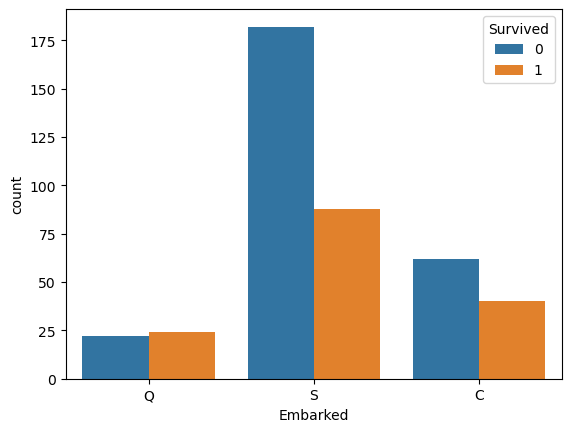

In [4]:
#surived by boarding port
sns.countplot(data=merge_data,x='Embarked',hue='Survived')

<Axes: xlabel='Pclass', ylabel='count'>

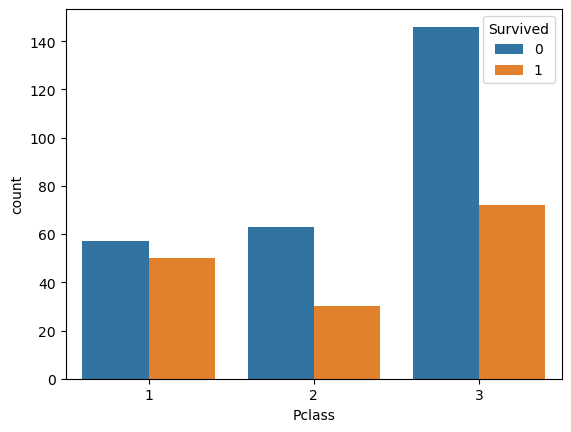

In [5]:
# Survied per class
sns.countplot(data=merge_data,x='Pclass',hue='Survived')

In [6]:
#survival by Gender
gend_survive=merge_data[(merge_data['Sex']=='female') & (merge_data['Survived']==1)].reset_index()
print(gend_survive)

     index  PassengerId  Pclass  \
0        1          893       3   
1        4          896       3   
2        6          898       3   
3        8          900       3   
4       12          904       1   
..     ...          ...     ...   
147    409         1301       3   
148    410         1302       3   
149    411         1303       1   
150    412         1304       3   
151    414         1306       1   

                                                Name     Sex   Age  SibSp  \
0                   Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
1       Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1   
2                               Connolly, Miss. Kate  female  30.0      0   
3          Abrahim, Mrs. Joseph (Sophie Halaut Easu)  female  18.0      0   
4      Snyder, Mrs. John Pillsbury (Nelle Stevenson)  female  23.0      1   
..                                               ...     ...   ...    ...   
147                        Peacock, Miss

In [7]:
merge_data['Age'] = merge_data['Age'].replace([float('inf'), -float('inf')], 0).fillna(0).astype(int)

In [8]:
print(merge_data)

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex  Age  SibSp  Parch              Ticket      Fare Cabin Embarked  \
0      male   34      0      0  

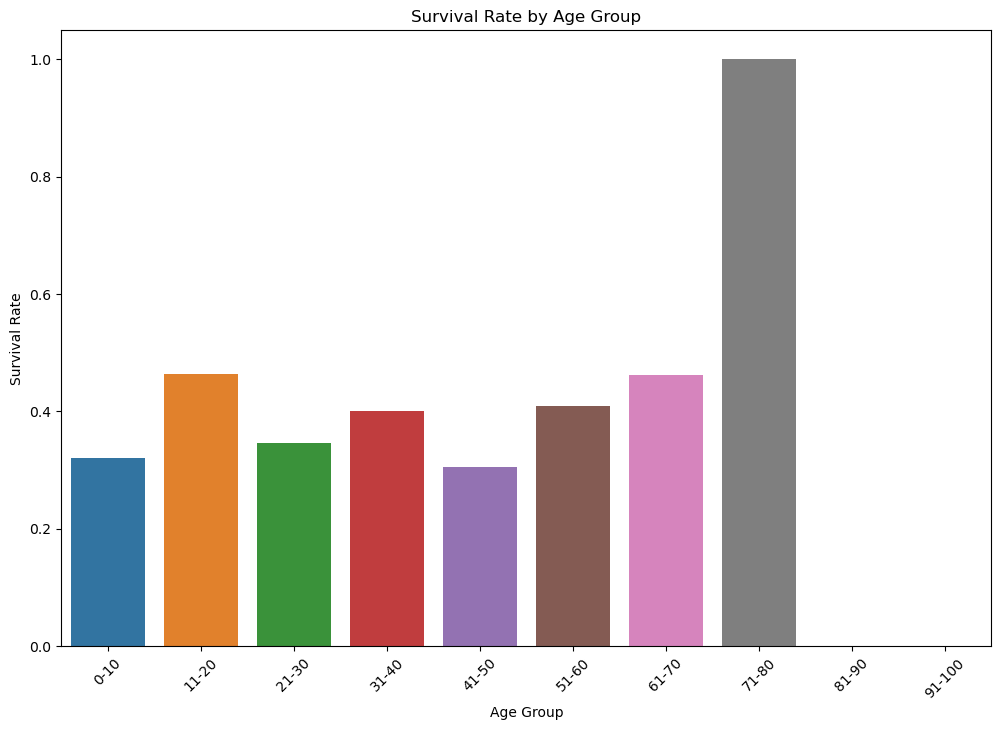

In [9]:
#in plotting
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define bins and labels
bins2 = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # Ensure bins are in increasing order
labels2 = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Create 'new_age' column based on bins
merge_data['new_age'] = pd.cut(merge_data['Age'], bins=bins2, labels=labels2, right=False)

# Group by 'new_age' and calculate the survival rate
age_group_survival = merge_data.groupby('new_age')['Survived'].mean().reset_index()

# Plot the survival rates
plt.figure(figsize=(12, 8))
sns.barplot(x='new_age', y='Survived', data=age_group_survival)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()